In [1]:
import numpy as np 
import tensorflow as tf 
import keras
from keras import utils 
from keras import layers 
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, Reshape
import matplotlib.pyplot as plt 
import pandas as pd

from astroNN.datasets import galaxy10 
from astroNN.datasets.galaxy10 import galaxy10cls_lookup, galaxy10_confusion 

WARNING! APOGEE environment variable SDSS_LOCAL_SAS_MIRROR not set
WARNING! Gaia environment variable GAIA_TOOLS_DATA not set


In [2]:
images, labels = galaxy10.load_data() #loading images
labels = utils.to_categorical(labels, 10) #convering labels to categorical values 

C:\Users\William\.astroNN\datasets\Galaxy10.h5 was found!


In [3]:
image_count = len(list(images))
print(image_count)
print(images)
print(labels)
print(type(images))
print(type(labels))

21785
[[[[16 18 15]
   [18 20 15]
   [16 17 12]
   ...
   [ 6  6  4]
   [ 9  9  7]
   [ 6  6  4]]

  [[19 24 20]
   [23 25 20]
   [17 18 13]
   ...
   [ 8  5  3]
   [10  8  6]
   [ 6  6  4]]

  [[17 22 18]
   [21 24 19]
   [17 18 13]
   ...
   [ 8  4  3]
   [11  8  7]
   [ 7  6  4]]

  ...

  [[17 14  7]
   [18 17  9]
   [15 14  7]
   ...
   [ 2  4  0]
   [ 3  5  0]
   [ 5  7  2]]

  [[22 14 11]
   [19 14  8]
   [12  9  3]
   ...
   [ 4  7  0]
   [ 6  9  2]
   [ 7 10  3]]

  [[30 12 11]
   [31 14  8]
   [24  9  2]
   ...
   [ 8 11  3]
   [11 14  6]
   [12 15  7]]]


 [[[ 1  3  0]
   [ 1  1  1]
   [ 1  1  1]
   ...
   [ 5  7  4]
   [ 3  5  2]
   [ 4  6  3]]

  [[ 1  2  0]
   [ 1  1  0]
   [ 0  0  0]
   ...
   [ 3  7  3]
   [ 2  6  2]
   [ 2  6  3]]

  [[ 3  3  1]
   [ 1  1  0]
   [ 0  0  0]
   ...
   [ 1  3  0]
   [ 2  4  1]
   [ 2  4  1]]

  ...

  [[ 5  7  4]
   [ 5  7  4]
   [ 3  5  2]
   ...
   [ 2  4  1]
   [ 1  3  1]
   [ 1  3  0]]

  [[ 4  6  3]
   [ 3  5  2]
   [ 2  4  1]
   ...

In [4]:
batch_size = 64
img_height = 69
img_width = 69
shuffle_buffer_size = 100

In [5]:
train_ds = tf.data.Dataset.from_tensor_slices((images[0:15428], labels[0:15428]))
train_ds = train_ds.shuffle(shuffle_buffer_size).batch(batch_size)
#train_images = images[:15428]
#train_labels = labels[:15428]
val_ds = tf.data.Dataset.from_tensor_slices((images[15429:17428], labels[15429:17428]))
val_ds = val_ds.shuffle(shuffle_buffer_size).batch(batch_size)
test_ds = tf.data.Dataset.from_tensor_slices((images[17429:], labels[17429:]))
test_ds = test_ds.shuffle(shuffle_buffer_size).batch(batch_size)

In [15]:
input_shape = (69, 69, 3)
num_classes = 10

model = Sequential()
model.add(layers.experimental.preprocessing.Rescaling(1./255, input_shape = input_shape))
model.add(layers.Conv2D(16, kernel_size = (1,1), padding = 'same', activation = 'relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(32, (3,3), padding = 'same', activation = 'relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(64, (3,3), padding = 'same', activation = 'relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Flatten())
model.add(layers.Dense(128, activation = 'relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes, activation = 'softmax'))


In [16]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005), loss = tf.keras.losses.CategoricalCrossentropy(), metrics = ['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 69, 69, 3)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 69, 69, 16)        64        
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 34, 34, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 34, 34, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 17, 17, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 17, 17, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 8, 8, 64)         

In [17]:
epochs = 25
classifier = model.fit(
    train_ds, 
    #train_images, 
    #train_labels, 
    batch_size = batch_size,
    validation_data = val_ds, 
    epochs = epochs
)

Epoch 1/15
242/242 [==============================] - 17s 71ms/step - loss: 1.6669 - accuracy: 0.3493 - val_loss: 1.4484 - val_accuracy: 0.4507
Epoch 2/15
242/242 [==============================] - 17s 70ms/step - loss: 1.3519 - accuracy: 0.4521 - val_loss: 1.1451 - val_accuracy: 0.5538
Epoch 3/15
242/242 [==============================] - 17s 69ms/step - loss: 1.2002 - accuracy: 0.5250 - val_loss: 1.0569 - val_accuracy: 0.5793
Epoch 4/15
242/242 [==============================] - 17s 70ms/step - loss: 1.1252 - accuracy: 0.5554 - val_loss: 0.9989 - val_accuracy: 0.6238
Epoch 5/15
242/242 [==============================] - 17s 70ms/step - loss: 1.0687 - accuracy: 0.5876 - val_loss: 0.9784 - val_accuracy: 0.6378
Epoch 6/15
242/242 [==============================] - 17s 70ms/step - loss: 1.0224 - accuracy: 0.6072 - val_loss: 0.9487 - val_accuracy: 0.6443
Epoch 7/15
242/242 [==============================] - 17s 70ms/step - loss: 0.9913 - accuracy: 0.6167 - val_loss: 0.8675 - val_accuracy:

In [18]:
evaluation = model.evaluate(test_ds)

69/69 [==============================] - 1s 17ms/step - loss: 0.8080 - accuracy: 0.7039


Text(0.5, 1.0, 'Validation Accuracy')

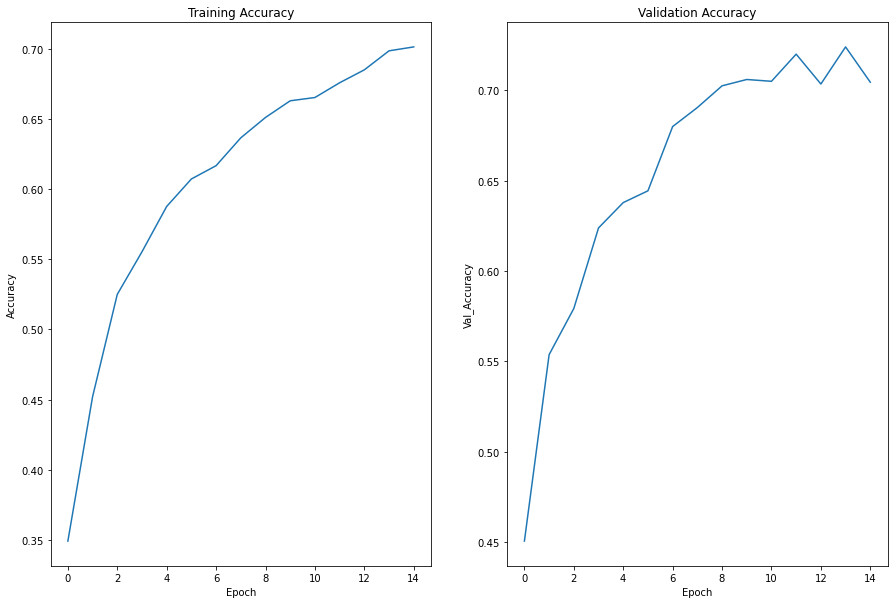

In [19]:
plt.figure(figsize=(15,10))
ax = plt.subplot(1, 2, 1)
plt.plot(classifier.history["accuracy"])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title("Training Accuracy")
ax = plt.subplot(1, 2, 2)
plt.plot(classifier.history["val_accuracy"])
plt.ylabel('Val_Accuracy')
plt.xlabel('Epoch')
plt.title("Validation Accuracy")

Text(0.5, 1.0, 'Validation Loss')

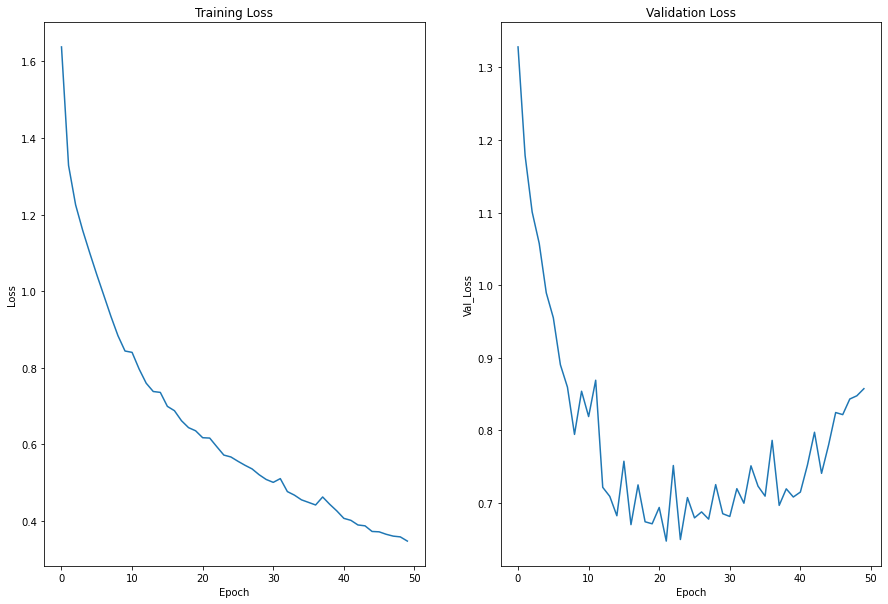

In [11]:
plt.figure(figsize=(15,10))
ax = plt.subplot(1, 2, 1)
plt.plot(classifier.history["loss"])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title("Training Loss")
ax = plt.subplot(1, 2, 2)
plt.plot(classifier.history["val_loss"])
plt.ylabel('Val_Loss')
plt.xlabel('Epoch')
plt.title("Validation Loss")

In [12]:
check = model.predict(test_ds)
check = pd.DataFrame(check)
check.columns = ['Disk, Face-on, No Spiral', 'Smooth, Completely round', 'Smooth, in-between round', 
                 'Smooth, Cigar shaped', 'Disk, Edge-on, Rounded Bulge', 'Disk, Edge-on, Boxy Bulge', 
                 'Disk, Edge-on, No Bulge', 'Disk, Face-on, Tight Spiral', 'Disk, Face-on, Medium Spiral', 'Disk, Face-on, Loose Spiral']

In [13]:
check 

,"Disk, Face-on, No Spiral","Smooth, Completely round","Smooth, in-between round","Smooth, Cigar shaped","Disk, Edge-on, Rounded Bulge","Disk, Edge-on, Boxy Bulge","Disk, Edge-on, No Bulge","Disk, Face-on, Tight Spiral","Disk, Face-on, Medium Spiral","Disk, Face-on, Loose Spiral"
0,7.906907e-02,7.565149e-01,1.644159e-01,7.898979e-14,1.050282e-09,1.170653e-17,1.102298e-16,9.163979e-09,2.103172e-08,3.469344e-08
1,3.882401e-06,7.340001e-01,2.659960e-01,5.488299e-21,2.984497e-19,1.012803e-30,5.544860e-23,1.342530e-11,1.204709e-14,1.414599e-14
2,8.458588e-01,1.246508e-03,1.528770e-01,8.935844e-11,1.680837e-08,6.305365e-16,1.184555e-13,2.982942e-06,1.871742e-06,1.284912e-05
3,2.414300e-03,3.495185e-05,9.975505e-01,1.864558e-12,8.941199e-09,2.164124e-21,1.398999e-18,8.219115e-12,1.391267e-09,2.792447e-07
4,1.708757e-02,4.226933e-04,9.824896e-01,3.457142e-12,2.908422e-10,4.826832e-19,3.098756e-15,1.161145e-07,1.518479e-08,1.302590e-08
...,...,...,...,...,...,...,...,...,...,...
4351,1.098442e-02,9.888372e-01,1.773565e-04,2.009508e-20,4.673067e-19,1.467050e-27,3.822679e-22,9.680250e-07,1.735748e-08,1.481362e-12
4352,7.330359e-03,9.926691e-01,5.305116e-07,3.547944e-25,1.051112e-20,2.549913e-29,2.792141e-26,6.133572e-10,9.174431e-14,1.068257e-16
4353,1.280038e-08,7.496617e-13,1.322945e-11,1.111783e-05,9.999188e-01,2.234730e-05,4.719468e-05,8.037237e-13,1.951261e-14,6.452581e-07
4354,5.586856e-01,7.578114e-03,4.337351e-01,1.181638e-09,6.093509e-08,9.986659e-16,2.835459e-12,3.206696e-08,2.275056e-07,9.124566e-07


C:\Users\William\anaconda3\lib\site-packages\astroNN\datasets\galaxy10.py:144: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


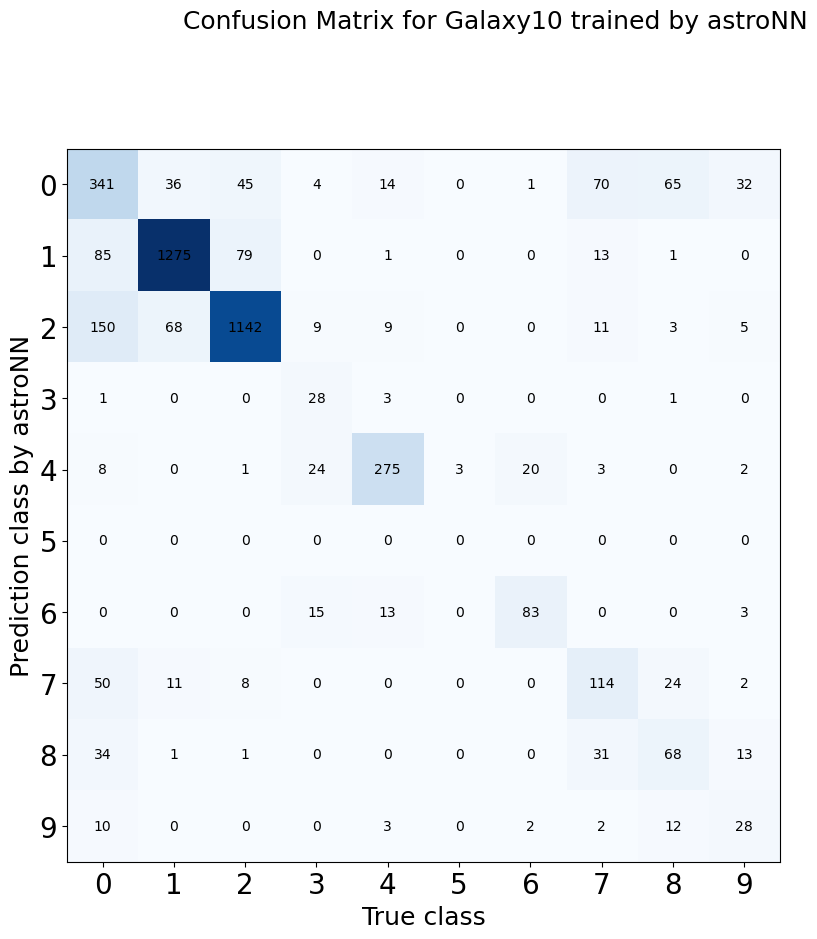

In [14]:
# Please notice predicted_labels are labels predicted from neural network. test_labels are ground truth from the dataset
predicted_labels = model.predict(images[17429:])

# Convert predicted_labels to class
prediction_class = np.argmax(predicted_labels, axis=1)

# Convert test_labels to class
test_class = np.argmax(labels[17429:], axis=1)

# Prepare a confusion matrix
confusion_matrix = np.zeros((10,10))

# create the confusion matrix
for counter, i in enumerate(prediction_class):
    confusion_matrix[i, test_class[counter]] += 1

# Plot the confusion matrix
galaxy10_confusion(confusion_matrix)